In [19]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def nextpow2(i):
    '''
    Find the next power 2 number for FFT
    '''
    
    n = 1
    while n < i: n *= 2
    return n

def shift_signal_in_frequency_domain(datin, shift):
    '''
    This is function to shift a signal in frequency domain. 
    The idea is in the frequency domain, 
    we just multiply the signal with the phase shift. 
    '''
    Nin = len(datin) 
    
    # get the next power 2 number for fft
    N = nextpow2(Nin +np.max(np.abs(shift)))
    
    # do the fft
    fdatin = np.fft.fft(datin, N)
    
    # get the phase shift for the signal, shift here is D in the above explaination
    ik = np.array([2j*np.pi*k for k in range(0, N)]) / N 
    fshift = np.exp(-ik*shift)
        
    # multiple the signal with the shift and transform it back to time domain
    datout = np.real(np.fft.ifft(fshift * fdatin))
    
    # only get the data have the same length as the input signal
    datout = datout[0:Nin]
    
    return datout

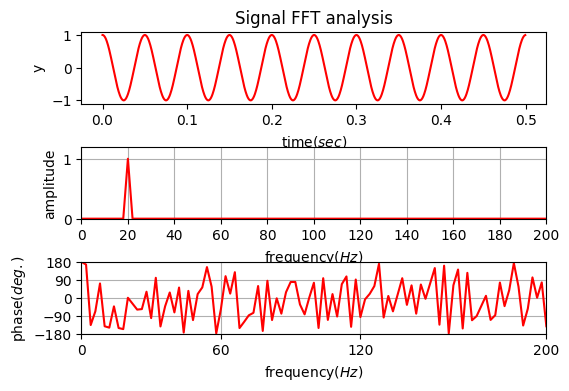

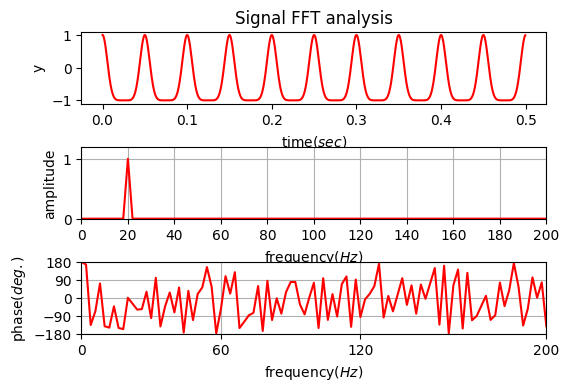

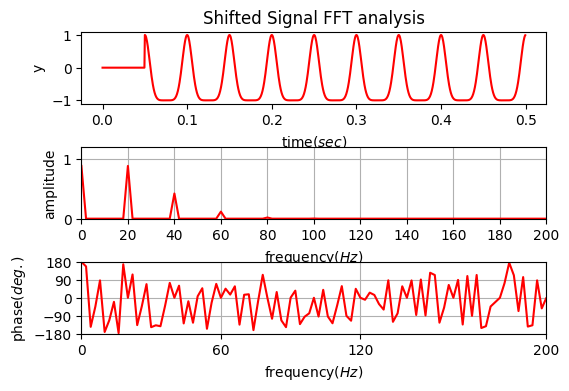

In [48]:
Fs = 2000                    # Sampling frequency
T = 1/Fs                     # Sample interval time
te= 0.5                     # End of time
t = np.arange(0, te, T)   # Time vector

# noise = np.random.normal(0,0.05,len(t))
frequency = 20
omega = 2 * np.pi * frequency

theta = 0
x = 1. * np.cos(omega * t + theta)
y = x 

# Calculate FFT ....................
n=len(y)
NFFT=n
k=np.arange(NFFT)
f0=k*Fs/NFFT
f0=f0[range(math.trunc(NFFT/2))]

Y=np.fft.fft(y)/NFFT
Y=Y[range(math.trunc(NFFT/2))]
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

# 20Hz의 위상변화가 없는 Sin 신호
# figure 1 ..................................
plt.figure(num=2,dpi=100,facecolor='white')
plt.subplots_adjust(hspace = 0.6, wspace = 0.3)
plt.subplot(3,1,1)
plt.plot(t,y,'r')
plt.title('Signal FFT analysis')
plt.xlabel('time($sec$)')
plt.ylabel('y')

# Amplitude ....
plt.subplot(3,1,2)
plt.plot(f0,amplitude_Hz,'r')
plt.xticks(np.arange(0,500,20))
plt.xlim( 0, 200)
plt.ylim( 0, 1.2)
plt.xlabel('frequency($Hz$)')
plt.ylabel('amplitude')
plt.grid()

# Phase ....
plt.subplot(3,1,3)
plt.plot(f0,phase_ang,'r')
plt.xlim( 0, 200)
plt.ylim( -180, 180)
plt.xlabel('frequency($Hz$)')
plt.ylabel('phase($deg.$)')
plt.xticks([0, 60, 120, 200])
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()

plt.show()
plt.close()

# ==============================================================================

# 위상변화 함수가 10Hz의 Sin함수인 10Hz의 Sin신호
frequency = 20
omega = 2 * np.pi * frequency

phase_frequency = 20
phase_omega = 2 * np.pi * phase_frequency
theta = 1. * np.sin(phase_omega * t)
x = 1. * np.cos(omega * t + theta)
y = x 

# figure 1 ..................................
plt.figure(num=2,dpi=100,facecolor='white')
plt.subplots_adjust(hspace = 0.6, wspace = 0.3)
plt.subplot(3,1,1)
plt.plot(t,y,'r')
plt.title('Signal FFT analysis')
plt.xlabel('time($sec$)')
plt.ylabel('y')

# Amplitude ....
plt.subplot(3,1,2)
plt.plot(f0,amplitude_Hz,'r')   #  2* ???
plt.xticks(np.arange(0,500,20))
plt.xlim( 0, 200)
plt.ylim( 0, 1.2)
plt.title('Single-Sided Amplitude Spectrum of y(t)')
plt.xlabel('frequency($Hz$)')
plt.ylabel('amplitude')
plt.grid()

# Phase ....
plt.figure(num=2,dpi=100,facecolor='white')
plt.subplot(3,1,3)
plt.plot(f0,phase_ang,'r')   #  2* ???
plt.xlim( 0, 200)
plt.ylim( -180, 180)
plt.xlabel('frequency($Hz$)')
plt.ylabel('phase($deg.$)')
plt.xticks([0, 60, 120, 200])
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()

plt.show()
plt.close()

# ==============================================================================

shifted_y = shift_signal_in_frequency_domain(y, 100)

shifted_f0=k*Fs/NFFT    # double sides frequency range
shifted_f0=shifted_f0[range(math.trunc(NFFT/2))]        # single sied frequency range

shifted_Y=np.fft.fft(y)/NFFT        # fft computing and normaliation
shifted_Y=shifted_Y[range(math.trunc(NFFT/2))]          # single sied frequency range
shifted_amplitude_Hz = 2*abs(shifted_Y)
shifted_phase_ang = np.angle(shifted_Y)*180/np.pi

# figure 1 ..................................
plt.figure(num=2,dpi=100,facecolor='white')
plt.subplots_adjust(hspace = 0.6, wspace = 1)
plt.subplot(3,1,1)

plt.plot(t,shifted_y,'r')
plt.title('Shifted Signal FFT analysis')
plt.xlabel('time($sec$)')
plt.ylabel('y')
#plt.xlim( 0, 0.1)

# Amplitude ....
#plt.figure(num=2,dpi=100,facecolor='white')
plt.subplot(3,1,2)

# Plot single-sided amplitude spectrum.

plt.plot(shifted_f0,shifted_amplitude_Hz,'r')   #  2* ???
plt.xticks(np.arange(0,500,20))
plt.xlim( 0, 200)
plt.ylim( 0, 1.2)
#plt.title('Single-Sided Amplitude Spectrum of y(t)')
plt.xlabel('frequency($Hz$)')
plt.ylabel('amplitude')
plt.grid()

# Phase ....
#plt.figure(num=2,dpi=100,facecolor='white')
plt.subplot(3,1,3)
plt.plot(shifted_f0,shifted_phase_ang,'r')   #  2* ???
plt.xlim( 0, 200)
plt.ylim( -180, 180)
#plt.title('Single-Sided Phase Spectrum of y(t)')
plt.xlabel('frequency($Hz$)')
plt.ylabel('phase($deg.$)')
plt.xticks([0, 60, 120, 200])
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()

In [105]:
class SlideWindows:
    def __init__(self, size : int, overlap : float):
        self.size = size
        self.step = round(size / overlap)
        
    def __call__(self, data):
        
        # data should be 1-d numpy.ndarray
        result = list()
        start_idx = 0        
        i = 0
        while((len(data) - start_idx) > 0):                                            
            start_idx = start_idx + (i * self.step)
            end_idx = start_idx + self.size
            
            if len(data) - start_idx < self.size:
                print("Hello")
                tmp = data[start_idx:].tolist()
                length = self.size - len(tmp)
                for i in range(length):
                    tmp.append(0)
                
                ex_list = list(set(tmp))
                if len(ex_list) > 0 and tmp != []:
                    tmp = np.asarray(tmp)
                    result.append(tmp)
                                                                         
            result.append(data[start_idx:end_idx])
            i += 1
            
        result = np.asarray(result).squeeze()
            
        return result                            

In [106]:
Fs = 2000                    # Sampling frequency
T = 1/Fs                     # Sample interval time
te= 5                     # End of time
t = np.arange(0, te, T)   # Time vector

# noise = np.random.normal(0,0.05,len(t))
frequency = 20
omega = 2 * np.pi * frequency

theta = 0
x = 1. * np.cos(omega * t + theta)
y = x

slidewindow = SlideWindows(size=50, overlap = 0.3)
result = slidewindow(y)
print(result)



#phase = list()

#num_slice, _ = result.shape
#for i in range(num_slice):
#    signal = result[i]

#    n = len(signal)    
#    NFFT = n
#    k = np.arange(NFFT)
#    f0 = k * Fs / NFFT
#    f0 = f0[range(math.trunc(NFFT/2))]
    
#    fft = np.fft.fft(signal)/NFFT
#    fft = fft[range(math.trunc(NFFT/2))]
#    amplitude_Hz = 2*abs(fft)
#    phase_ang = np.angle(fft) * 180 / np.pi
    
#    phase.append(phase_ang[20])
    
    #plt.figure(figsize=(15,3))
    #plt.plot(f0,phase_ang,'r')    
    #plt.ylim( -180, 180)    
    #plt.xlabel('frequency($Hz$)')
    #plt.ylabel('phase($deg.$)')    
    #plt.yticks([-180, -90, 0, 90, 180])
    #plt.grid()
    
#print(phase)


Hello
[array([ 1.00000000e+00,  9.98026728e-01,  9.92114701e-01,  9.82287251e-01,
        9.68583161e-01,  9.51056516e-01,  9.29776486e-01,  9.04827052e-01,
        8.76306680e-01,  8.44327926e-01,  8.09016994e-01,  7.70513243e-01,
        7.28968627e-01,  6.84547106e-01,  6.37423990e-01,  5.87785252e-01,
        5.35826795e-01,  4.81753674e-01,  4.25779292e-01,  3.68124553e-01,
        3.09016994e-01,  2.48689887e-01,  1.87381315e-01,  1.25333234e-01,
        6.27905195e-02,  6.12323400e-17, -6.27905195e-02, -1.25333234e-01,
       -1.87381315e-01, -2.48689887e-01, -3.09016994e-01, -3.68124553e-01,
       -4.25779292e-01, -4.81753674e-01, -5.35826795e-01, -5.87785252e-01,
       -6.37423990e-01, -6.84547106e-01, -7.28968627e-01, -7.70513243e-01,
       -8.09016994e-01, -8.44327926e-01, -8.76306680e-01, -9.04827052e-01,
       -9.29776486e-01, -9.51056516e-01, -9.68583161e-01, -9.82287251e-01,
       -9.92114701e-01, -9.98026728e-01])
 array([-4.81753674e-01, -4.25779292e-01, -3.681245

In [2]:
# emg file directory & path

emg_rock_short_path = "./myo/myo_emg_data(short_frequently_lock).txt"
emg_rock_long_path = "./myo/myo_emg_data(long, Rock).txt"
emg_nothing = "./myo/myo_emg_data(nothing).txt"

In [3]:
# load Strongly Short Power emg data

sensor_channels = 8
short_emgs = [list() for i in range(sensor_channels)]

with open(emg_rock_short_path) as f:
    while(1):                
        line = f.readline().rstrip()
        line = line.replace(" ", "")
        if (line is None or line == ""):
            break
        
        #print(line)        
        _emgs = line.split("\t")                
        
        for i in range(sensor_channels):
            short_emgs[i].append(int(_emgs[i]))
            

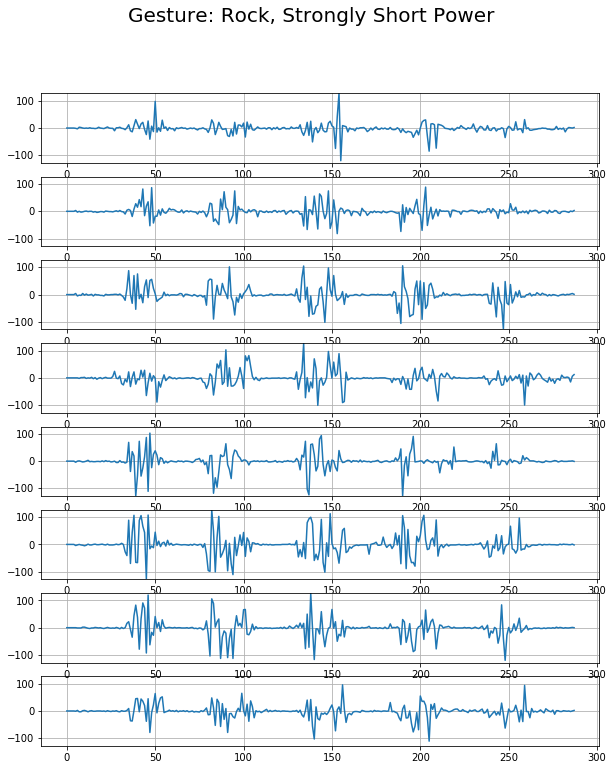

In [4]:
fig = plt.figure(figsize=(10,12))
fig.suptitle("Gesture: Rock, Strongly Short Power", fontsize=20)

for i in range(sensor_channels):
    arg = "81" + str(i)
    plt.subplot(arg)
    plt.plot(short_emgs[i])
    plt.grid()
    plt.ylim([-128, 127])


plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

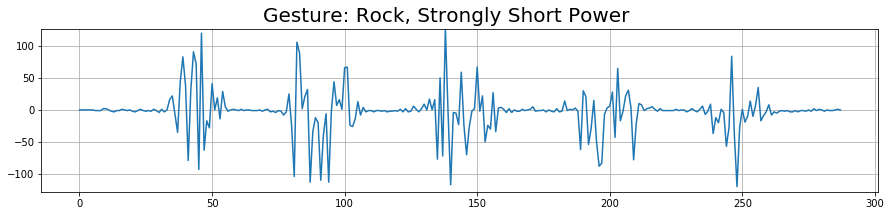

In [10]:
fig = plt.figure(figsize=(15, 3))
fig.suptitle("Gesture: Rock, Strongly Short Power", fontsize=20)

plt.plot(short_emgs[i])
plt.grid()
plt.ylim([-128, 127])

plt.show()

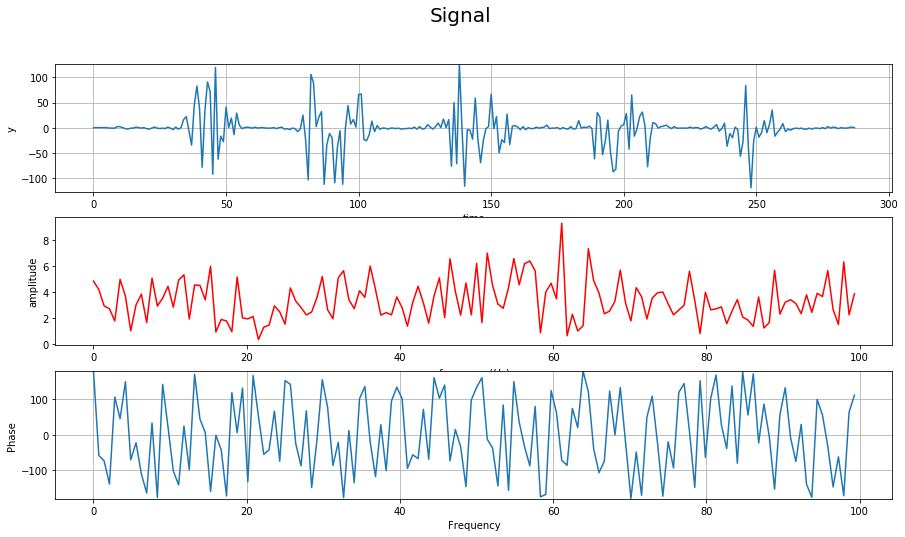

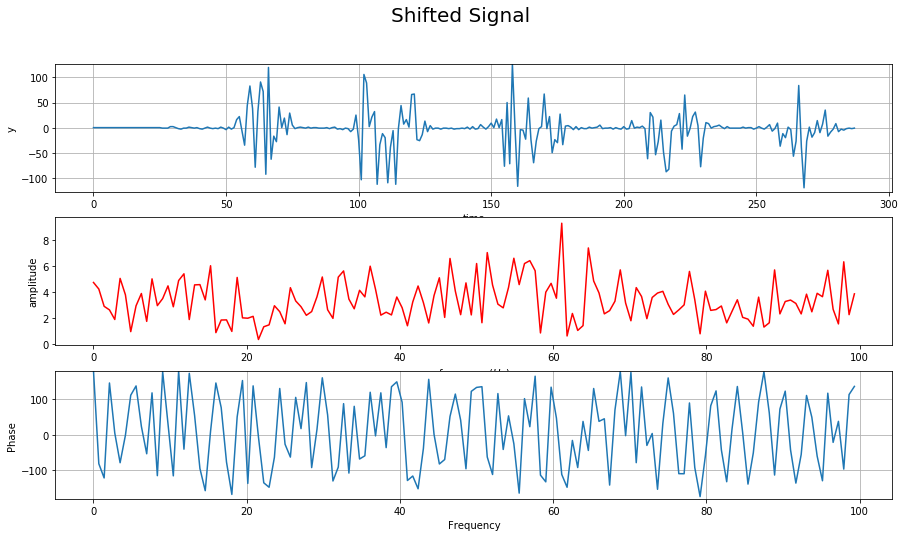

In [26]:
signal = short_emgs[i]



Fs = 200.
NFFT = len(signal)
k = np.arange(NFFT)
f0 = k*Fs/NFFT
f0 = f0[range(math.trunc(NFFT/2))]

Y=np.fft.fft(signal)/NFFT               # fft computing and normaliation
Y=Y[range(math.trunc(NFFT/2))]          # single sied frequency range
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

fig = plt.figure(figsize=(15, 8))
fig.suptitle("Signal", fontsize=20)

plt.subplot(311)
plt.plot(short_emgs[i])
plt.grid()
plt.ylim([-128, 127])
plt.xlabel("time")
plt.ylabel("y")

plt.subplot(312)
plt.plot(f0, amplitude_Hz, 'r')
plt.xlabel("frequency($Hz$)")
plt.ylabel("amplitude")

plt.subplot(313)
plt.plot(f0, phase_ang)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.ylim( -180, 180)

plt.show()

# Shifted
shifted_signal = shift_signal_in_frequency_domain(signal, 20)

Y=np.fft.fft(shifted_signal)/NFFT               # fft computing and normaliation
Y=Y[range(math.trunc(NFFT/2))]          # single sied frequency range
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

fig = plt.figure(figsize=(15, 8))
fig.suptitle("Shifted Signal", fontsize=20)

plt.subplot(311)
plt.plot(shifted_signal)
plt.grid()
plt.ylim([-128, 127])
plt.xlabel("time")
plt.ylabel("y")

plt.subplot(312)
plt.plot(f0, amplitude_Hz, 'r')
plt.xlabel("frequency($Hz$)")
plt.ylabel("amplitude")

plt.subplot(313)
plt.plot(f0, phase_ang)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.ylim( -180, 180)

plt.show()


